In [2]:
import warnings
warnings.filterwarnings("ignore")
#!pip install ftfy
import ftfy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
from math import exp
from numpy import sign
import sys
print(sys.executable)
from PIL import Image # getting images in notebook
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# !pip install tensorflow==2.0

# !pip install tensorflow_hub

# !pip install bert-for-tf2
# !pip install sentencepiece

C:\Users\SHWETANK VERMA\Anaconda3\latest\python.exe


[nltk_data] Downloading package stopwords to C:\Users\SHWETANK
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SHWETANK
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#pip install tensorflow

In [4]:
from tensorflow import keras 
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
import re
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

In [5]:
SEED = 42
DROPOUT = 0.5
EPOCHS = 3
LEARN_RATE = 1e-4
SPLIT = 0.2
BATCH_SIZE = 32

In [6]:
train=pd.read_csv(r'C:\Users\SHWETANK VERMA\Documents\Mlstuff\Major-1\Datasets\train.csv')

In [7]:
train.sample(3)

,PID,Text_data,Label
3040,train_pid_3041,Alone for new years. : This one goes out to my...,moderate
8716,train_pid_8717,"I, (18M) feel guilty of existing : I don't kno...",severe
6622,train_pid_6623,So the past few days was the closest I came to...,not depression


In [8]:
test=pd.read_csv(r'C:\Users\SHWETANK VERMA\Documents\Mlstuff\Major-1\Datasets\dev.csv')

In [9]:
print("Training set has {} rows and {} columns.".format(train.shape[0], train.shape[1]))
print("Test set has {} rows and {} columns.".format(test.shape[0], test.shape[1]))

print()
print(train.columns)
print(test.columns)

Training set has 8891 rows and 3 columns.
Test set has 4496 rows and 3 columns.

Index(['PID', 'Text_data', 'Label'], dtype='object')
Index(['PID', 'Text data', 'Label'], dtype='object')


In [10]:
Sentiment = {'moderate': 1,'not depression': 0,'severe':2}
train.Label = [Sentiment[item] for item in train.Label]
test.Label= [Sentiment[item] for item in test.Label]

In [11]:
train.sample(3)

,PID,Text_data,Label
4430,train_pid_4431,Everything is getting worse. And I don’t know ...,1
6165,train_pid_6166,Alone for the first hours of 2020 : Hey there\...,0
4198,train_pid_4199,"Don’t know what to do : It’s New Year’s Eve, I...",1


In [12]:
test.sample(3)


,PID,Text data,Label
1436,dev_pid_1437,Pregnant and depressed. : My husband and I got...,1
568,dev_pid_569,I lost my entire identity tonight : I grew up ...,1
678,dev_pid_679,Sometimes it's the little things that can make...,1


In [13]:
print('Count NaN:')
print(train.isnull().sum(), '\n')
print('Percentage NaN:')
print(train.isnull().sum()/ len(train))

Count NaN:
PID          0
Text_data    0
Label        0
dtype: int64 

Percentage NaN:
PID          0.0
Text_data    0.0
Label        0.0
dtype: float64


In [14]:
print('Count NaN:')
print(test.isnull().sum(), '\n')
print('Percentage NaN:')
print(test.isnull().sum()/ len(test))

Count NaN:
PID          0
Text data    0
Label        0
dtype: int64 

Percentage NaN:
PID          0.0
Text data    0.0
Label        0.0
dtype: float64


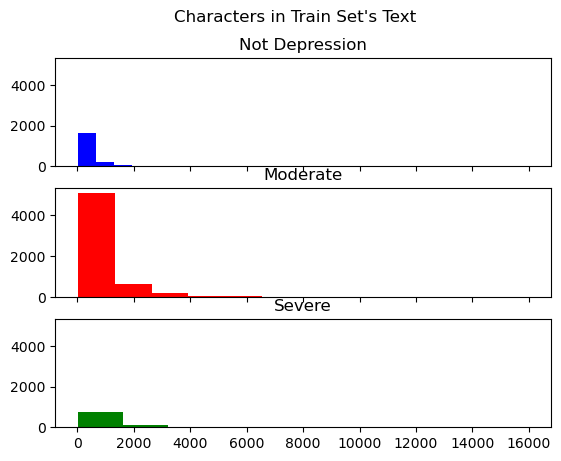

In [15]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
train_len = train[train['Label'] == 0]['Text_data'].str.len()
axs[0].hist(train_len,color='blue')
axs[0].set_title('Not Depression')
train_len = train[train['Label'] == 1]['Text_data'].str.len()
axs[1].hist(train_len,color='red')
axs[1].set_title('Moderate')
train_len = train[train['Label'] == 2]['Text_data'].str.len()
axs[2].hist(train_len,color='green')
axs[2].set_title('Severe')
fig.suptitle('Characters in Train Set\'s Text')
plt.show()

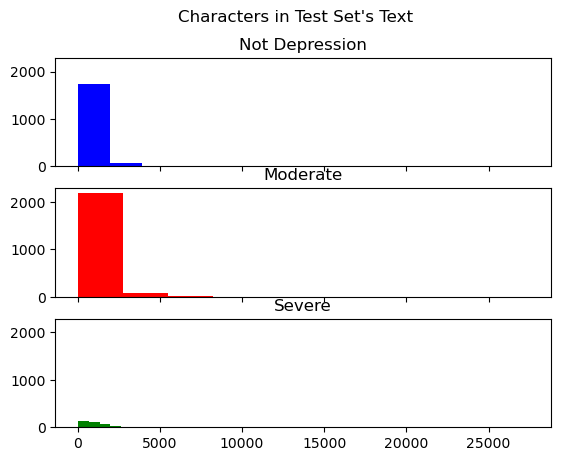

In [16]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
test_len = test[test['Label'] == 0]['Text data'].str.len()
axs[0].hist(test_len,color='blue')
axs[0].set_title('Not Depression')
test_len = test[test['Label'] == 1]['Text data'].str.len()
axs[1].hist(test_len,color='red')
axs[1].set_title('Moderate')
test_len = test[test['Label'] == 2]['Text data'].str.len()
axs[2].hist(test_len,color='green')
axs[2].set_title('Severe')
fig.suptitle('Characters in Test Set\'s Text')
plt.show()

<Figure size 500x500 with 0 Axes>

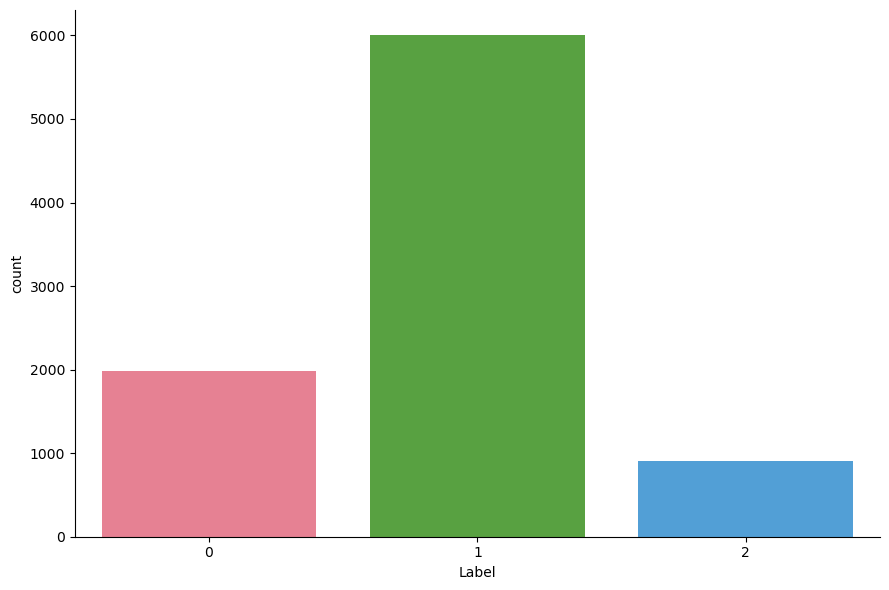

In [17]:
fig = plt.figure(figsize=(5,5))
sns.catplot(x="Label", data=train, kind="count", height=6, aspect=1.5, palette="husl")
plt.show();

In [18]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# NLTK Tweet Tokenizer for now
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)

corpus = []

# clean up text
def clean_text(text):
    """
    Copied from other notebooks
    """
    # expand acronyms
    
    # special characters
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    # emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    
    """
    Our Stuff
    """
    # remove numbers
    text = re.sub(r'[0-9]', '', text)
    
    # remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        text = text.replace(p, '')
        
    # remove urls
    text = re.sub(r'http\S+', '', text)
    
    # tokenize
    text = tknzr.tokenize(text)
    
    # remove stopwords
    text = [w.lower() for w in text if not w in stop_words]
    corpus.append(text)
    
    # join back
    text = ' '.join(text)
    
    return text

In [19]:
%%time
train['Text_data'] = train['Text_data'].apply(lambda s: clean_text(s))
test['Text data'] = test['Text data'].apply(lambda s: clean_text(s))

# see some cleaned data
train.sample(10)

Wall time: 11 s


,PID,Text_data,Label
8319,train_pid_8320,im sorry i cant go ill lucky i go one yeah i m...,2
1455,train_pid_1456,worst year life i ’ glad year started cutting ...,1
516,train_pid_517,happy new years crying hit happy new years guy...,1
8043,train_pid_8044,what number i endure i give it ’ new ’ day i ’...,2
8000,train_pid_8001,at point genuinely curious sort shit throws wa...,2
6721,train_pid_6722,одиночество всем привет из казахстана меня зов...,0
313,train_pid_314,currently wife nye and i ’ stop anxiety depres...,1
2196,train_pid_2197,passive active i always suicidal passively i n...,1
670,train_pid_671,know come hurt feel chest heavy tell im suppos...,1
843,train_pid_844,fuck everything fuck everything,1


In [21]:
!pip install spacy-download
!pip install allennlp
# python -m spacy download en_core_web_sm
# import spacy
# print(spacy.__file__)
# import sys
# print(sys.executable)

     --------------------------------------- 12.2/12.2 MB 32.7 MB/s eta 0:00:00
  Using cached cymem-2.0.7-cp39-cp39-win_amd64.whl (30 kB)
  Using cached preshed-3.0.8-cp39-cp39-win_amd64.whl (96 kB)
  Using cached murmurhash-1.0.9-cp39-cp39-win_amd64.whl (18 kB)
     ---------------------------------------- 1.5/1.5 MB 31.2 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 46.2 MB/s eta 0:00:00
     ---------------------------------------- 181.6/181.6 kB ? eta 0:00:00
     ------------------------------------- 482.8/482.8 kB 31.5 MB/s eta 0:00:00
  Using cached blis-0.7.9-cp39-cp39-win_amd64.whl (7.0 MB)
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


     -------------------------------------- 730.2/730.2 kB 2.0 MB/s eta 0:00:00
  Using cached sacremoses-0.0.53-py3-none-any.whl
     ---------------------------------------- 4.4/4.4 MB 28.4 MB/s eta 0:00:00
  Using cached more_itertools-9.1.0-py3-none-any.whl (54 kB)
  Using cached lmdb-1.4.1-cp39-cp39-win_amd64.whl (105 kB)
     ---------------------------------------- 1.1/1.1 MB 34.1 MB/s eta 0:00:00
     --------------------------------------- 11.7/11.7 MB 13.9 MB/s eta 0:00:00
     -------------------------------------- 117.4/117.4 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 8.8 MB/s eta 0:00:00
     ------------------------------------- 161.8/161.8 MB 10.6 MB/s eta 0:00:00
  Using cached tensorboardX-2.6-py2.py3-none-any.whl (114 kB)
     ---------------------------------------- 62.8/62.8 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 248.2/248.2 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing bui

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.28.2 which is incompatible.


In [22]:
!pip freeze
!python -m spacy download en_core_web_sm

absl-py==1.3.0
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
allennlp==2.10.1
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid==2.4.2
astropy @ file:///C:/ci/astropy_1657719656942/work
astunparse==1.6.3
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tm

     ---------------------------------------- 12.8/12.8 MB 7.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2023-04-21 22:27:23.136503: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-21 22:27:23.136565: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
test

,PID,Text data,Label
0,dev_pid_1,i enjoyed today i still ! tomorrows depression...,1
1,dev_pid_2,i sorta tried kill i total breakdown fucking c...,1
2,dev_pid_3,best suicide method i like quick easy deformit...,1
3,dev_pid_4,story i remember time id get ds play nintendog...,1
4,dev_pid_5,the world cares beautiful people im born ugly ...,1
...,...,...,...
4491,dev_pid_4492,aren ’ tired i ’ depressed months i lost trust...,2
4492,dev_pid_4493,need help coping i life pretty much figured to...,2
4493,dev_pid_4494,qutting zoloft cold turkey i mg sertraline mon...,2
4494,dev_pid_4495,crying i ’ coming antidepressants emotions com...,2


In [27]:
# !pip install allennlp
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Tokenize the text using spaCy
    doc = nlp(text)
    # Remove stop words and lemmatize the tokens
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    # Join the tokens back into a string
    return " ".join(tokens)


In [28]:
# Preprocess the training and testing text data
train["Text_data"] = train["Text_data"].apply(preprocess_text)
test["Text data"] = test["Text data"].apply(preprocess_text)

In [29]:
train["Text_data"][0]

'wait mind breakdown new year feeling anymore know little bit worried depressed day time year try breakdown start mere day later break cry entire year december ok month wait weird way act feel feel bit normal'

In [32]:
def extractF(df):
    verbs = []
    args = []

    for text in df["Text_data"]:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == "VERB":
                verbs.append(token.text)
                for child in token.children:
                    if child.pos_ != "PUNCT":
                        args.append(child.text)

    # Create a vocabulary of unique verbs and arguments
    vocab = list(set(verbs + args))
    
    for verb in verbs:
        df[verb] = df["Text_data"].apply(lambda x: 1 if verb in x else 0)

    for arg in args:
        df[arg] = df["Text_data"].apply(lambda x: 1 if arg in x else 0)
    
    return vocab

In [33]:
def extractF2(df):
    verbs = []
    args = []

    for text in df["Text data"]:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == "VERB":
                verbs.append(token.text)
                for child in token.children:
                    if child.pos_ != "PUNCT":
                        args.append(child.text)

    # Create a vocabulary of unique verbs and arguments
    vocab = list(set(verbs + args))
    
    for verb in verbs:
        df[verb] = df["Text data"].apply(lambda x: 1 if verb in x else 0)

    for arg in args:
        df[arg] = df["Text data"].apply(lambda x: 1 if arg in x else 0)
    
    return vocab

In [34]:
vocab1 = extractF(train)
vocab2 = extractF2(test)

In [35]:
vocab = list(set(vocab1 + vocab2))
vocab

['selfie',
 'fr',
 'cinch',
 'lived',
 'eyeopene',
 'torture',
 'christmas',
 'hurdle',
 'books',
 'smear',
 'deferred',
 'parasite',
 'officially',
 'gay',
 'abit',
 'presentable',
 'neck',
 'csnt',
 'island',
 'michigan',
 'lonely',
 'moody',
 'wellpassionate',
 'rightfully',
 'restless',
 'collegecareer',
 'scream',
 'frend',
 'nothing',
 'cancer',
 'in',
 'whinge',
 'meaning',
 'paranoidc',
 'vocal',
 'way',
 'art',
 'christianity',
 'powerful',
 'careful',
 'partneri',
 'overpass',
 'defeat',
 'sideeffect',
 'eagerly',
 'tryyy',
 'prevent',
 'lottery',
 'exagerate',
 'request',
 'lame',
 'changer',
 'potency',
 'succumb',
 'cynical',
 'confuse',
 'haywire',
 'thrive',
 'packing',
 'tangental',
 'neurofeedback',
 'm',
 'blew',
 'bus',
 'doesnti',
 'proactive',
 'previously',
 'okay',
 'composure',
 'define',
 'cheerful',
 'chapter',
 'journaling',
 'mangas',
 'adjust',
 'obligated',
 'saul',
 'weaken',
 'pathetic',
 'helpagain',
 'exactly',
 'intensifie',
 'trip',
 'ruthlessly',
 '

In [36]:
texts = train['Text_data'].to_numpy()
word_freq = {}

for text in texts:
    for word in text.split():
        word_freq[word] = word_freq.get(word, 0) + 1

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 40

tokenizer = Tokenizer()

tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
num_words = len(word_index) + 1
print('Found %s unique tokens.' % (num_words - 1))

# pad 
data = pad_sequences(
    sequences, 
    maxlen=MAX_SEQUENCE_LENGTH,
    padding='post', 
    truncating='post'
)

labels = train['Label'].to_numpy()
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10007 unique tokens.
Shape of data tensor: (8891, 40)
Shape of label tensor: (8891,)


In [38]:
x_train = data
y_train = labels

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import roc_auc_score

vectorizer = CountVectorizer(vocabulary=vocab)
x_train_vectorized = vectorizer.fit_transform(train['Text_data'])

# print vocabulary
print(vectorizer.get_feature_names()[2500:2600])

['atitude', 'doim', 'immaturity', 'unreasonable', 'student', 'statement', 'terrify', 'woman', 'selfhate', 'consultant', 'racing', 'revert', 'reiterate', 'occur', 'amount', 'galaxy', 'decreasing', 'record', 'noticer', 'hostel', 'cuff', 'reture', 'reality', 'june', 'generosity', 'oxcarbazepine', 'pharmacist', 'vulnerable', 'attempt', 'versus', 'oil', 'rang', 'unreal', 'h', 'loase', 'profile', 'exasperate', 'disintereste', 'donation', 'disgrace', 'steal', 'paint', 'serotonindeficient', 'hand', 'organize', 'clip', 'imbalance', 'fkn', 'rocky', 'newbie', 'bigot', 'softball', 'sont', 'unite', 'still', 'consecutively', 'blankly', 'mayjune', 'spoil', 'desk', 'infect', 'gravity', 'barclub', 'psychotherapy', 'guilted', 'disappointmentyou', 'devaste', 'aged', 'tremendously', 'andrew', 'monster', 'now', 'noshow', 'tab', 'ar', 'residency', 'outgo', 'quesrion', 'embody', 'suck', 'teenage', 'fantasize', 'flatly', 'deadbeat', 'pun', 'succeed', 'trope', 'tracknotice', 'ardently', 'alllll', 'whereabouts'

In [40]:
y_train_NB = np.array(train['Label'])

In [41]:
# alpha is smoothing param
model_NB = BernoulliNB(alpha=1.0)
model_NB.fit(x_train_vectorized, y_train_NB)

# prepare test
x_test_NB = vectorizer.transform(test['Text data'])

In [42]:
train.Label.value_counts()

1    6004
0    1985
2     902
Name: Label, dtype: int64

In [43]:
count_vec = CountVectorizer(vocabulary=vocab)
bow = count_vec.fit_transform(train['Text_data'])
bow = np.array(bow.todense())

In [44]:
X = bow
y = train['Label']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y)

In [46]:
model = MultinomialNB().fit(X_train, y_train)

In [47]:
y_pred = model.predict(X_test)

In [48]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.8324587706146926
F1 score: 0.7356347453111852


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70       595
           1       0.84      0.96      0.89      1802
           2       0.71      0.54      0.62       271

    accuracy                           0.83      2668
   macro avg       0.81      0.69      0.74      2668
weighted avg       0.83      0.83      0.82      2668



ValueError: Iterable over raw text documents expected, string object received.

In [33]:
#Using tf-idf

In [33]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [34]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(train.Label.values)

In [35]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train.Text_data.values, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [36]:
print (xtrain.shape)
print (xvalid.shape)

(8001,)
(890,)


In [37]:

tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)

In [38]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [39]:
clf = MultinomialNB()
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict_proba(xvalid_tfv)

print ("logloss: %0.3f " % multiclass_logloss(yvalid, predictions))

logloss: 0.477 


In [42]:
print(p)

ValueError: y_true and y_pred have different number of output (1!=3)

In [41]:
#Using BERT

In [42]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [43]:
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-6), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [44]:
x=train["Text_data"]
y=train["Label"]

In [45]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7112,) (1779,) (7112,) (1779,)


In [47]:
vect = CountVectorizer(stop_words = 'english')

x_train_cv = vect.fit_transform(X_train)
x_test_cv = vect.transform(X_test)

In [48]:
clf = MultinomialNB()
clf.fit(x_train_cv, y_train)

MultinomialNB()

In [49]:
pred=clf.predict(x_test_cv)

In [50]:
#pip install wget

In [2]:
X="the real reason why you're sad? you're attached to people who have been distant with you. you're paying attention to people who ignore you. you make time for people who are  for you. you're too caring to people who are care less when it comes to you. let those people go"
print(clf.predict(X))

NameError: name 'clf' is not defined

In [51]:
# !wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [52]:
# %%time
# module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
# bert_layer = hub.KerasLayer(module_url, trainable=True)

In [53]:


# import tensorflow_hub as hub
# import tensorflow as tf
# from bert import tokenization
# from tensorflow.keras.models import Model  

In [54]:
# vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
# do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
# from bert import bert_tokenization
# tokenizer = bert_tokenization.FullTokenizer(
#         vocab_file, 
#         do_lower_case
#     )

In [55]:
# train_input = bert_encode(train.Text_data.values, tokenizer, max_len=160)
# test_input = bert_encode(test['Text data'].values, tokenizer, max_len=160)
# train_labels = train.Label.values

In [56]:
# model = build_model(bert_layer, max_len=160)
# model.summary()

In [57]:
# train_history = model.fit(
#     train_input, train_labels,
#     validation_split=0.2,
#     epochs=10,
#     batch_size=16
# )

# model.save('model.h5')

In [58]:
# Split data into train and test sets
import gensim
X_train, X_test, y_train, y_test = train_test_split (train['Text_data'], train['Label'] , test_size=0.2)
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train['Text_data'], train['Label'], stratify= train['Label'])

In [60]:
# !pip install tensorflow-text --user
# import tensorflow_text as text

In [62]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

FileNotFoundError: Op type not registered 'CaseFoldUTF8' in binary running on LAPTOP-R44ULE5N. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing (e.g.) `tf.contrib.resampler` should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.